# Normality test using hypothesis testing

In [118]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

In [95]:
df1 = pd.read_csv("Gold.csv", parse_dates = True, index_col=0)
df1= df1.rename(columns={'Open': 'Gold'})
df1.head()

,Gold,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300


In [97]:
df3 = pd.read_csv("USD_Index.csv", parse_dates = True, index_col=0)
df3 = df3.rename(columns={'Price': 'USD'})
df3.head()

,USD,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-05-31,97.877,98.060,98.075,97.857,-,-0.18%
2019-05-30,98.053,98.040,98.195,98.000,-,0.02%
2019-05-29,98.035,97.795,98.100,97.750,12.41K,0.20%
2019-05-28,97.842,97.605,97.865,97.570,13.14K,0.37%
2019-05-27,97.477,97.430,97.665,97.420,2.94K,0.00%


In [98]:
df4 = pd.read_csv("Crude_Oil.csv", parse_dates = True, index_col=0)
df4 = df4.rename(columns={'Price': 'Oil'})
df4.head()

,Oil,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-05-31,55.09,56.00,56.22,54.87,-,-2.65%
2019-05-30,56.59,59.12,59.70,56.33,820.33K,-3.77%
2019-05-29,58.81,59.07,59.14,56.88,1.12M,-0.56%
2019-05-28,59.14,58.94,59.57,58.13,1.02M,-0.03%
2019-05-27,59.16,58.77,59.26,58.14,-,0.66%


In [99]:
df5 = pd.read_csv("Interest_Rate.csv", parse_dates = True, index_col=0)
df5 = df5.rename(columns={'Open': 'Interest'})
df5.head()

,Interest,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6.377,6.440,6.377,6.435,6.435,0.0
2000-01-03,6.498,6.603,6.498,6.548,6.548,0.0
2000-01-04,6.530,6.548,6.485,6.485,6.485,0.0
2000-01-05,6.521,6.599,6.508,6.599,6.599,0.0
2000-01-06,6.558,6.585,6.540,6.549,6.549,0.0


In [100]:
df6 = pd.read_csv("Stock_Index.csv", parse_dates = True, index_col=0)
df6 = df6.rename(columns={'Open': 'Stock'})
df6.head()

,Stock,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,6876.100098,6876.100098,6876.100098,6876.100098,6876.100098,0
2000-01-03,6762.109863,6762.109863,6762.109863,6762.109863,6762.109863,0
2000-01-04,6543.759766,6543.759766,6543.759766,6543.759766,6543.759766,0
2000-01-05,6567.029785,6567.029785,6567.029785,6567.029785,6567.029785,0
2000-01-06,6635.439941,6635.439941,6635.439941,6635.439941,6635.439941,0


In [113]:
dataset = pd.concat([df1.Gold, df3.USD, df4.Oil, df5.Interest, df6.Stock], axis=1) # combining dataframes
dataset.head()

,Gold,USD,Oil,Interest,Stock
Date,,,,,
1999-12-31,17.9375,NaN,NaN,6.377,6876.100098
2000-01-03,17.5625,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,100.34,24.78,6.558,6635.439941


In [114]:
df = dataset.loc['20000101':'20180501'] 
df.head()

,Gold,USD,Oil,Interest,Stock
Date,,,,,
2000-01-03,17.5625,99.89,NaN,6.498,6762.109863
2000-01-04,17.3125,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,100.34,24.78,6.558,6635.439941
2000-01-07,17.8125,100.50,24.22,6.545,6792.669922


In [115]:
df.isnull().sum()

Gold        108
USD          24
Oil          66
Interest    112
Stock       108
dtype: int64

In [116]:
data= df.fillna(method ='pad') # filling the missing values with previous ones 
data.isnull().sum()

Gold        0
USD         0
Oil         1
Interest    0
Stock       0
dtype: int64

In [120]:
new_data = data.dropna(axis = 0, how ='any')

In [124]:
new_data.head()

,Gold,USD,Oil,Interest,Stock
Date,,,,,
2000-01-04,17.3125,100.10,25.55,6.530,6543.759766
2000-01-05,17.5625,100.05,24.91,6.521,6567.029785
2000-01-06,17.7500,100.34,24.78,6.558,6635.439941
2000-01-07,17.8125,100.50,24.22,6.545,6792.669922
2000-01-10,17.4375,100.65,24.67,6.540,6838.450195


In [130]:
from scipy import stats
stat,p = stats.normaltest(new_data.Gold)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
  print('Data looks Gaussian (fail to reject H0)')
else:
  print('Data do not look Gaussian (reject H0)')

Statistics=523.462, p=0.000
Data do not look Gaussian (reject H0)


count    4718.000000
mean       25.680407
std        11.979899
min         6.080000
25%        16.420000
50%        20.780001
75%        34.257498
max        55.540001
Name: Gold, dtype: float64

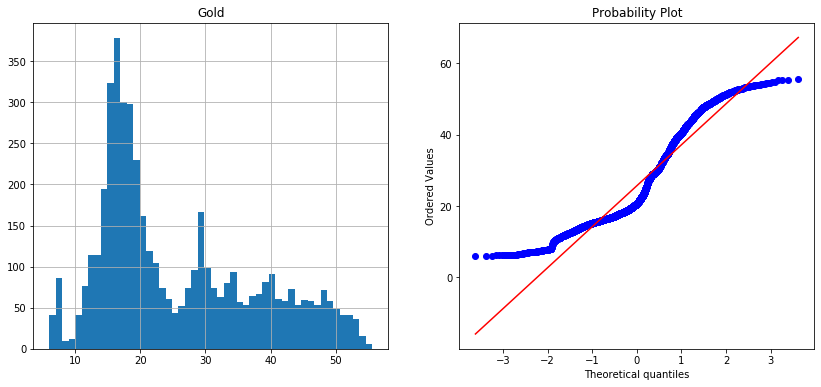

In [131]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
new_data['Gold'].hist(bins=50)
plt.title('Gold')
plt.subplot(1,2,2)
stats.probplot(new_data['Gold'], plot=plt);
new_data.Gold.describe().T

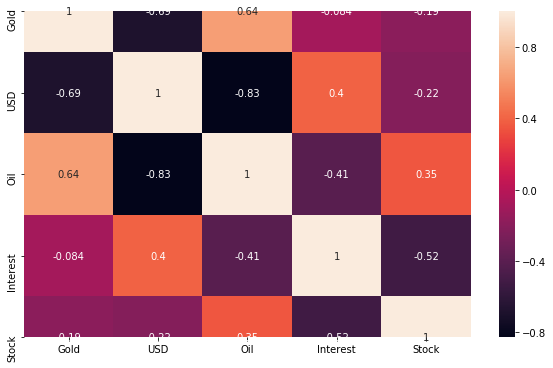

In [137]:
corr = new_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [138]:
train_data = new_data[:4000]
test_data = new_data[4000:1129]